# Analyzing vowels in my voice

## Time Domain waveforms

Sampling Rate: 16000 Hz


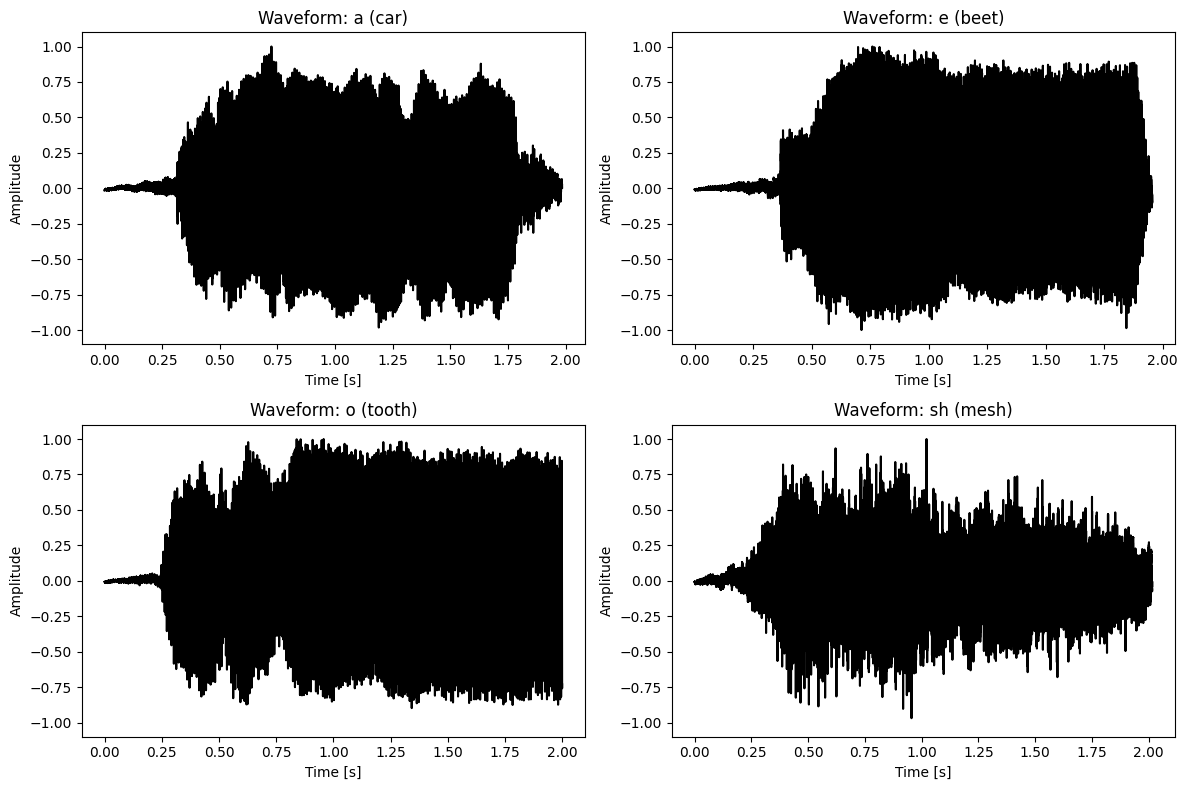

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

files = {
    "a (car)": "my_voice_a.wav",
    "e (beet)": "my_voice_e.wav",
    "o (tooth)": "my_voice_o.wav",
    "sh (mesh)": "my_voice_sh.wav"
}

signals = {}
sr = None

for label, fname in files.items():
    data, sr = sf.read(fname)   # sr should be 16 kHz
    if data.ndim > 1:
        data = data[:, 0]
    # Normalize amplitude between ±1
    data = data / np.max(np.abs(data))
    signals[label] = data

print(f"Sampling Rate: {sr} Hz")  # prints 16000

plt.figure(figsize=(12, 8))

for i, (label, sig) in enumerate(signals.items(), 1):
    t = np.arange(len(sig)) / sr
    plt.subplot(2, 2, i)
    plt.plot(t, sig, color="black")
    plt.title(f"Waveform: {label}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.ylim([-1.1, 1.1])

plt.tight_layout()
plt.show()


### Q) State your observations on the distinct spectral attributes seen in the plots obtained above.

Observations (Time-Domain)

a (car): Smooth, periodic oscillations with moderate pitch and sustained amplitude.

e (beet): More tightly packed oscillations, indicating higher pitch than /a/.

o (tooth): Periodic with slightly lower oscillation rate, resembling a lower pitch.

sh (mesh): Irregular, aperiodic waveform with rapid fluctuations, which is typical of fricatives.


## DFT Magnitude Spectrum

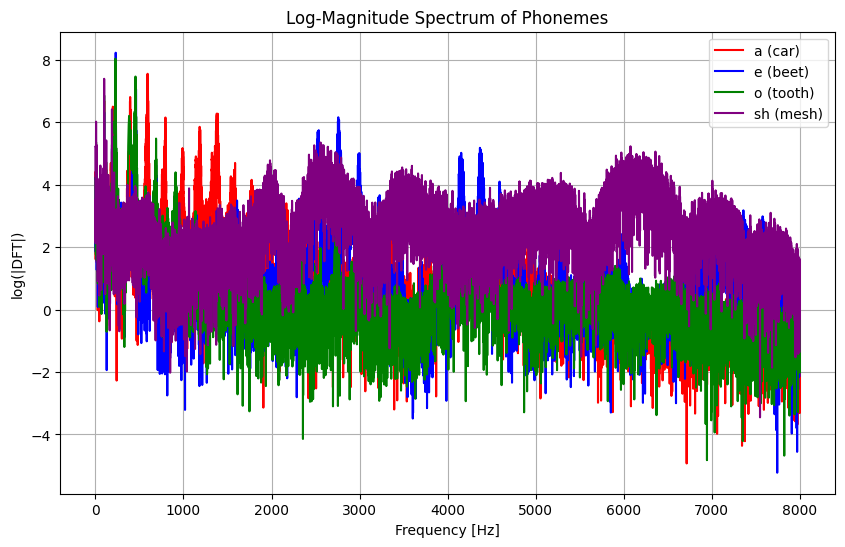

In [4]:

plt.figure(figsize=(10, 6))

colors = ["red", "blue", "green", "purple"]

for (label, sig), c in zip(signals.items(), colors):
    spectrum = np.fft.rfft(sig)
    freqs = np.fft.rfftfreq(len(sig), d=1/sr)

    # Log magnitude spectrum
    log_mag = np.log(np.abs(spectrum) + 1e-10)

    # Limit freq axis to 0–8 kHz
    mask = freqs <= 8000
    plt.plot(freqs[mask], log_mag[mask], label=label, color=c)

plt.title("Log-Magnitude Spectrum of Phonemes")
plt.xlabel("Frequency [Hz]")
plt.ylabel("log(|DFT|)")
plt.legend()
plt.grid(True)
plt.show()